# PHYS 210 Lecture 16 - Nov 04, 2024
Agenda:

1. Announcements
1. Reading recap, polling questions and Q&A
1. Group Worksheet 16

## Project 03 details were posted
* In-class time on Wednesday and after the break
* Peer feedback time the class after the break

## Project submission deadline #4
* In early October I moved this deadline ahead to Nov 7 so that people didn't feel like they had a reading break obligation to the course and to create a bit more time for grading
* I did not communicate this clearly so there are students that were still expecting the Nov 12 deadline
* **The new compromise:** The due date has been changed back to Nov 12. On Nov 8, I will assign graders for all projects that are in by Nov 7 and those will be prioritized (i.e., returned sooner). On Nov 13, I will do the same for the remainder of the projects. 

## Histogram review, reading recap, "polling" questions and Q&A

### Review of `plt.hist`
```python
plt.hist(x, bins = n_bins, range=(min, max))
```
- **`x`**: The data .
- **`bins`**: The number of bins or a list of bin edges (optional, default is 10).
- **`range`**: The lower and upper range of the bins (optional).


In [1]:
# Simple example 
import numpy as np
import matplotlib.pyplot as plt

# Random data
data = np.random.randn(1000)  # 1000 samples from a standard normal distribution


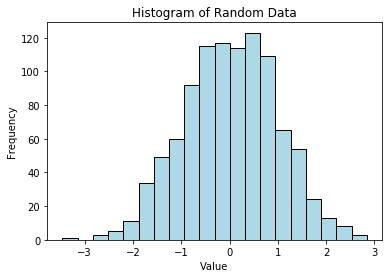

In [2]:
plt.hist(data, bins=20, color='lightblue', edgecolor='black')
plt.title("Histogram of Random Data"); plt.xlabel("Value")
plt.ylabel("Frequency"); plt.show()

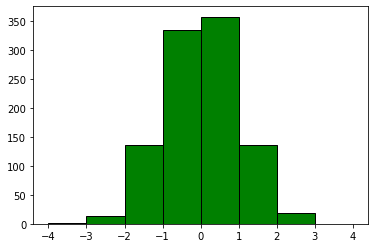

In [3]:
# Example with custom bin edges
plt.hist(data, bins=[-4,-3,-2, -1, 0, 1, 2, 3, 4], color='green', edgecolor='black')
plt.show()

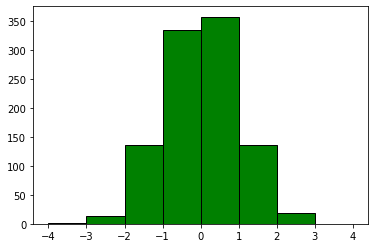

In [4]:
# Example with custom bin edges using 'range'
plt.hist(data, bins=range(-4,5), color='green', edgecolor='black')
plt.show()

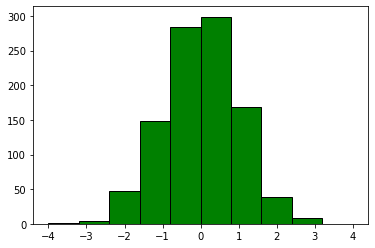

In [5]:
# Example with using "range=(min,max)"
plt.hist(data, range=(-4,4), color='green', edgecolor='black')
plt.show()

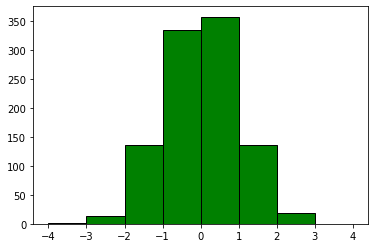

In [6]:
# Updating the previous example to match the earlier number of bins
plt.hist(data, range=(-4,4), bins=8 , color='green', edgecolor='black')
plt.show()

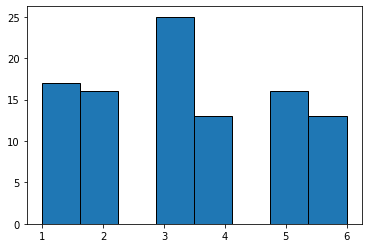

In [7]:
# Generating discrete data representing die rolls
data = np.random.randint(1, 7, 100)

# Plotting the histogram with automatic binning
plt.hist(data, bins='auto', edgecolor='black')
plt.xticks(range(1, 7)); plt.show()

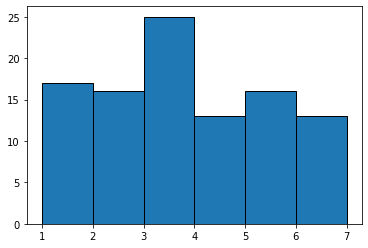

In [8]:
# Forcing the correct number of bins (with the correct values)
plt.hist(data, bins=range(1,8), edgecolor='black')
plt.show()

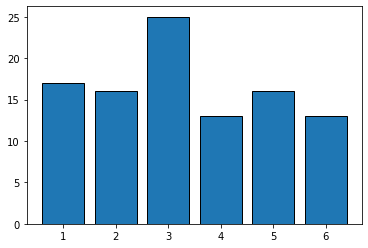

In [9]:
# Sometimes bar graph might be more appropriate
values, counts = np.unique(data, return_counts=True) # frequency of each outcome

plt.bar(values, counts, edgecolor='black')
plt.show()

### Recap of Markov Chain Monte Carlo and the Metropolis probability


**Group Q16.1:** 
What are the conditions for each of the following?

1. p = 0<br>
1. 0 < p < 1<br>
1. p = 1<br>
1.  p > 1<br>

In [17]:
# dE = xf**2 - xi**2
# p = np.exp(-dE / kT) # Metropolis probability

# A. very big dE
# B. xf > xi
# C. xf = xi
# D. xf < xi
# E. Other

**A different example:** We model an ideal gas as a collection of non-interacting atoms inside a box of length $L$. Like you have likely encountered with the Bohr atom, the energy of such an atom goes like $n^2$, where $n$ is the principal quantum number, which can only take on values of 1, 2, 3, ...

Formally, the energy of each atom, of mass $m$ is

$$E(n) = \frac{\pi^2 \hbar^2}{2 m L}n^2 = \frac{\pi^2}{2}n^2,$$

when we choose a system of units with $m = L = \hbar = 1$

**The approach for one atom**
1. **Initialization**: Start with an atom in an initial quantum state of $n=1$.
2. **Proposal**: Propose a move to change to a new state based on the current one (atom will try to increase or decrease its energy). These moves are proposed with equal probability, even if they are not accepted with equal probability
3. **Acceptance**: Accept all moves that would <u>decrease</u> the energy of the system from an excited state $n>1$. Reject a move that would try to <u>decrease</u> the energy of the ground state ($n=1$). Accept a move that would <u>increase</u> the energy of the system according to the Metropolis probability.
4. **Iteration**: Iterate 200 times.

In [11]:
# The one atom ideal gas

def delta_energy(ni, nf):
    return np.pi**2 / 2 * (nf**2 - ni**2)

Temp = 20 # k_B*T
Nsteps = 200 # Number of steps

# Iniital quantum state and energy
n = 1
E = n**2 * np.pi**2 / 2

E_t = np.zeros(Nsteps) # Store E(t)

In [12]:
for j in range(Nsteps):

    # The proposed move
    dn = np.random.choice([-1, 1])       

    # dE for proposed moveu
    dE = delta_energy( n , n+dn )
    
    # Decide whether to accept the move
    if not (n == 1 and dn == -1): # Can't move down
        if np.random.random() < np.exp(-dE/Temp):
            n += dn
            E += dE
    
    E_t[j] = E

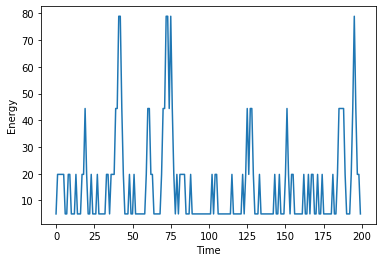

In [13]:
# Make the graph
plt.plot(E_t)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

### Now, we look at the multi-atom gas

In [18]:
Temp = 20 # k_B*T
Nsteps = 50000 
Natoms = 1000

n = np.ones(Natoms) # Initial states for Natoms

E = Natoms * np.pi**2 / 2 # Initial energy of system

# Array to store the energy evolution over time
E_t = np.zeros(Nsteps)

In [19]:
for j in range(Nsteps):

    # Choose which atom will have the proposed move
    atom = np.random.randint(Natoms)
    
    # The proposed move
    dn = np.random.choice([-1, 1])       

    # dE for proposed moveu
    dE = delta_energy( n[atom] , n[atom]+dn )
    
    # Decide whether to accept the move
    if not (n[atom] == 1 and dn == -1): # Can't move down
        if np.random.random() < np.exp(-dE/Temp):
            n[atom] += dn
            E += dE
    
    E_t[j] = E

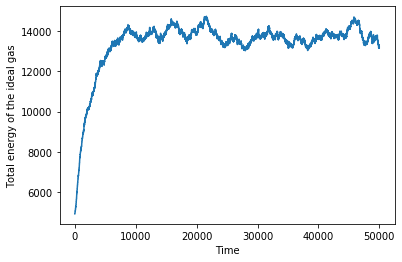

In [20]:
# Make the graph
plt.plot(E_t)
plt.xlabel("Time")
plt.ylabel("Total energy of the ideal gas")
plt.show()